In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

### Loading the data

In [134]:
zf = zipfile.ZipFile('loan.zip')

In [135]:
date_mon_yy = lambda x: pd.datetime.strptime(x, '%d-%B-%y')

In [136]:
loans_df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]),parse_dates=True) 

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
print('Total no. of columns is ',len(loans_df.columns))

Total no. of columns is  111


In [138]:
loans_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [139]:
total_rows = loans_df.shape[0]

### % of missing fields

In [140]:
round((loans_df.isna().sum()/total_rows)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

### Removing the columns whose values are null

In [141]:
loans_df1 = loans_df.dropna(axis=1,how='all')

#### after removing null columns finally we got 57 columns

In [142]:
print('no. of columns after removing na/null',len(loans_df1.columns))

no. of columns after removing na/null 57


In [143]:
 round((loans_df1.isna().sum()/loans_df1.shape[0])*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### next_pyment_d is 97% empty

In [144]:
loans_df1.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

### Next payment (upcomming) column doesnt need so droping off.

In [145]:
loans_df1.drop(columns='next_pymnt_d',axis=1,inplace=True)
len(loans_df1.columns)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


56

In [146]:
round((loans_df1.isna().sum()/loans_df1.shape[0])*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [147]:
loans_df1['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [148]:
loans_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [149]:
loans_df1.loc['revol_util'] =loans_df1.revol_util.apply(lambda x: float(str(x).replace('%','')))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
loans_df1.loc['term'] =loans_df1.term.apply(lambda x: str(x).replace('months','').strip())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Catagerical column: 'emp_length' re-arranging to range as per definition

In [151]:
loans_df1.emp_length.value_counts()/total_rows

10+ years    0.223557
< 1 year     0.115391
2 years      0.110482
3 years      0.103104
4 years      0.086512
5 years      0.082635
1 year       0.081577
6 years      0.056122
7 years      0.044641
8 years      0.037238
9 years      0.031674
Name: emp_length, dtype: float64

In [152]:
loans_df1.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### Creating dict for emp_length

In [153]:
## 0-1, 1-9,10+, na
## corr the title company..... revisit
emp_len_dict = {k:'0-10 years' for k in loans_df1.emp_length.unique()}
emp_len_dict['n/a']='n/a'
emp_len_dict['10+ years'] = '10+ years'
emp_len_dict['< 1 year']='0 years'


print(emp_len_dict)


{'10+ years': '10+ years', '< 1 year': '0 years', '1 year': '0-10 years', '3 years': '0-10 years', '8 years': '0-10 years', '9 years': '0-10 years', '4 years': '0-10 years', '5 years': '0-10 years', '6 years': '0-10 years', '2 years': '0-10 years', '7 years': '0-10 years', nan: '0-10 years', 'n/a': 'n/a'}


### Replacing nan to 'n/a' for emp_length

In [154]:
loans_df1.emp_length.fillna('n/a',inplace=True,axis=0)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [155]:
loans_df1['emp_length_range'] = loans_df1.emp_length.map(emp_len_dict)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
loans_df1['emp_length_range'].unique()

array(['10+ years', '0 years', '0-10 years', 'n/a'], dtype=object)

In [157]:
(loans_df1.emp_length_range.value_counts()/total_rows)*100

0-10 years    63.398545
10+ years     22.355666
0 years       11.539139
n/a            2.711685
Name: emp_length_range, dtype: float64

#### from above emp_lenght % , n/a is 2% of total row's. so it can ignore

In [158]:
loanData = loans_df1.copy()

In [159]:
loanData.drop(columns=['url'],axis=1,inplace=True)

In [160]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'emp_length_range'],
 

### convert to date 

In [161]:
col_date =['issue_d','last_pymnt_d','last_credit_pull_d']

In [162]:
loanData['issue_d'].head(20)

0     Dec-11
1     Dec-11
2     Dec-11
3     Dec-11
4     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
8     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
13    Dec-11
14    Dec-11
15    Dec-11
16    Dec-11
17    Dec-11
18    Dec-11
19    Dec-11
Name: issue_d, dtype: object

In [163]:
loanData['issue_d'] = pd.to_datetime(loanData['issue_d'],format='%b-%y')

In [164]:
loanData.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


In [165]:
loanData.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med'],axis=1,inplace=True)

In [166]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies', 'emp_length_range'],
      dtype='object')

In [167]:
loanData.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,-0.008769
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346


In [168]:
loanData['int_rate'] = loanData['int_rate'].str.rstrip('%').astype('float')

In [169]:
loanData = loanData.drop(['title', 'zip_code'], axis=1)

In [170]:
loanData['revol_util'] = loanData['revol_util'].str.rstrip('%').astype('float')

In [171]:
# Filter data of loan_status for only charged off and fully paid, as we don't need the current status coustomer
loanData = loanData[loanData['loan_status'].isin(['Charged Off','Fully Paid'])]
print(loanData.shape)
print(loanData.shape)

(38577, 48)
(38577, 48)


In [172]:
loanData['loan_status'] = loanData['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [173]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies', 'emp_length_range'],
      dtype='object')

Univariate Analysis - Mithun

In [174]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
loanData.loc[loanData['home_ownership']=='RENT']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,emp_length_range
0,1077501.0,1296599.0,5000.0,5000.0,4975.00000,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,INDIVIDUAL,0.0,10+ years
1,1077430.0,1314167.0,2500.0,2500.0,2500.00000,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,0 years
2,1077175.0,1313524.0,2400.0,2400.0,2400.00000,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,INDIVIDUAL,0.0,10+ years
3,1076863.0,1277178.0,10000.0,10000.0,10000.00000,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,10+ years
5,1075269.0,1311441.0,5000.0,5000.0,5000.00000,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,INDIVIDUAL,0.0,0-10 years
6,1069639.0,1304742.0,7000.0,7000.0,7000.00000,60 months,15.96,170.08,C,C5,...,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,INDIVIDUAL,0.0,0-10 years
7,1072053.0,1288686.0,3000.0,3000.0,3000.00000,36 months,18.64,109.43,E,E1,...,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,INDIVIDUAL,0.0,0-10 years
9,1071570.0,1306721.0,5375.0,5375.0,5350.00000,60 months,12.69,121.45,B,B5,...,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,INDIVIDUAL,0.0,0 years
12,1064687.0,1298717.0,9000.0,9000.0,9000.00000,36 months,13.49,305.38,C,C1,...,570.26,0.00,444.30,4.1600,Jul-12,305.38,Nov-12,INDIVIDUAL,0.0,0 years
13,1069866.0,1304956.0,3000.0,3000.0,3000.00000,36 months,9.91,96.68,B,B1,...,480.27,0.00,0.00,0.0000,Jan-15,102.43,May-16,INDIVIDUAL,0.0,0-10 years


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


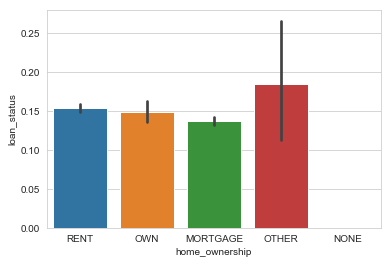

In [176]:
# plotting default rates across grade of the loan
sns.barplot(x='home_ownership', y='loan_status', data=loanData)
plt.show()



D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


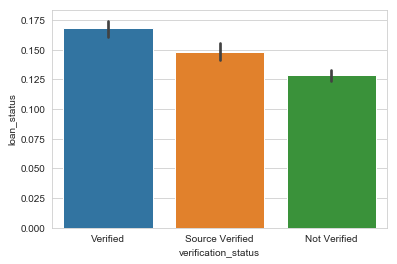

In [177]:
sns.barplot(x='verification_status', y='loan_status', data=loanData)
plt.show()


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


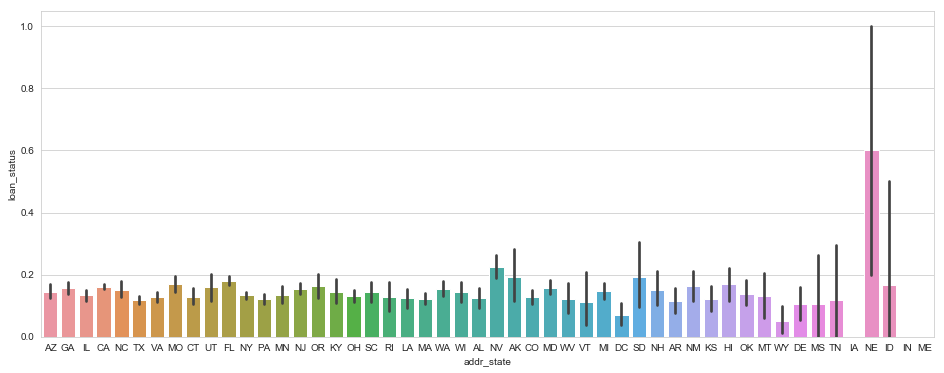

In [178]:
plt.figure(figsize=(16, 6))
sns.barplot(x='addr_state', y='loan_status', data=loanData)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


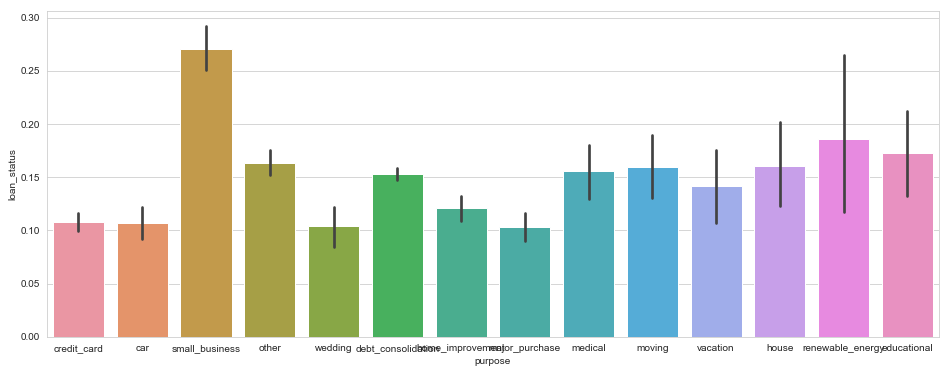

In [179]:
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=loanData)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


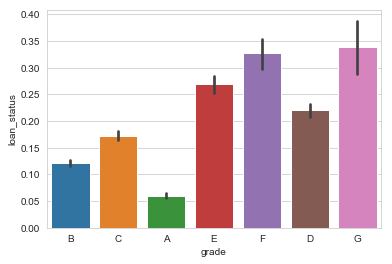

In [180]:
sns.barplot(x='grade', y='loan_status', data=loanData)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


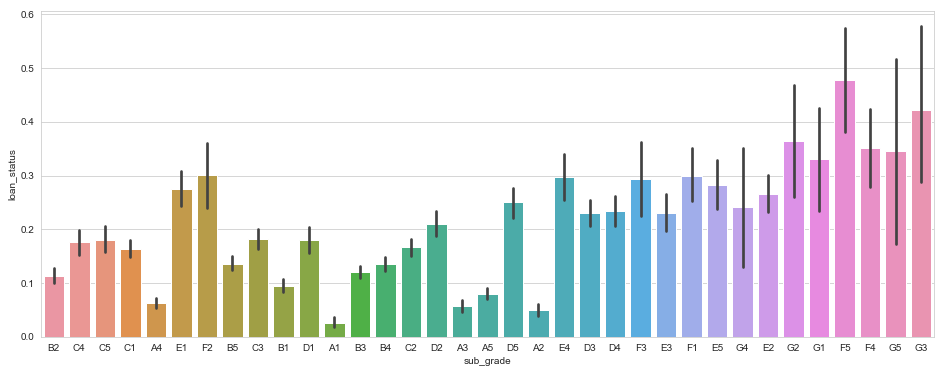

In [181]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=loanData)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


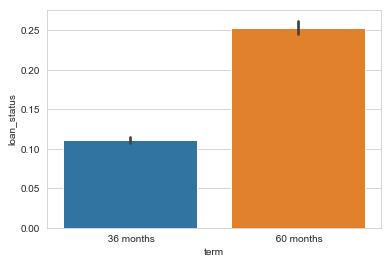

In [182]:
sns.barplot(x='term', y='loan_status', data=loanData)
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


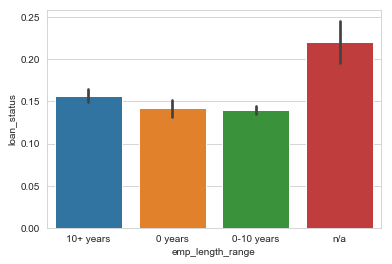

In [183]:
sns.barplot(x='emp_length_range', y='loan_status', data=loanData)
plt.show()

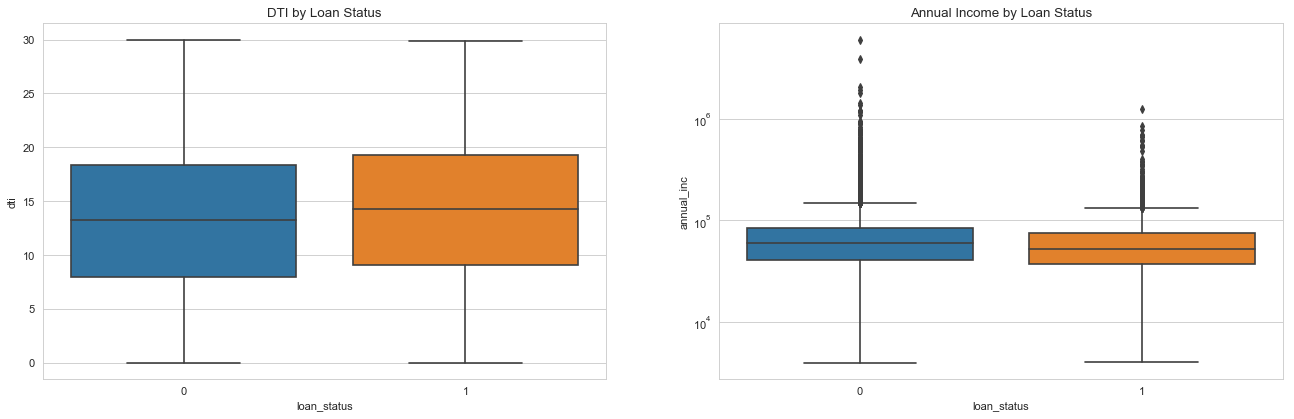

In [184]:
sns.set_style('whitegrid')
plt.figure(num=None,figsize=(20,20),dpi=80)
plt.subplot(321)
plt.title('DTI by Loan Status')
sns.boxplot(x = 'loan_status', y = 'dti', data = loanData)
plt.subplot(322)
plt.title('Annual Income by Loan Status')
plt.yscale('log')
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = loanData)

loan_amnt


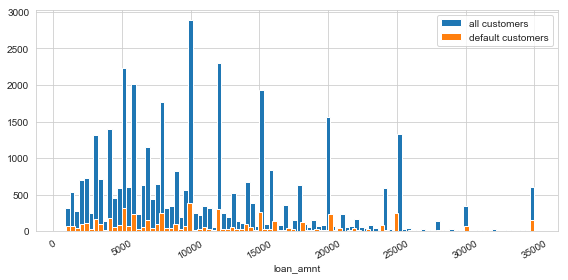

funded_amnt


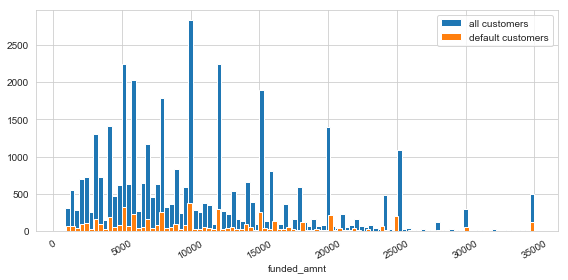

funded_amnt_inv


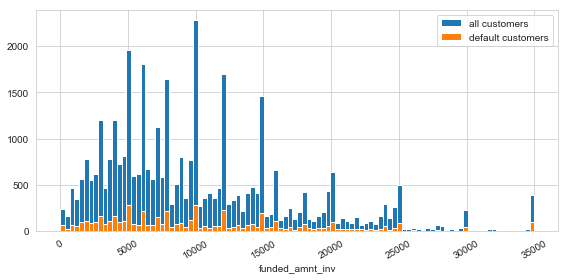

annual_inc


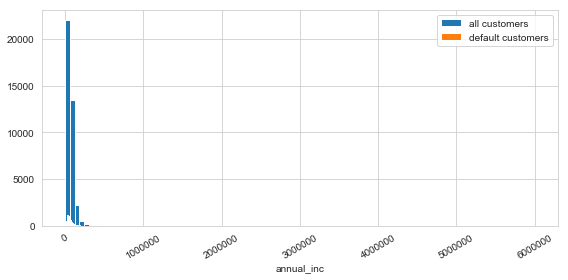

installment


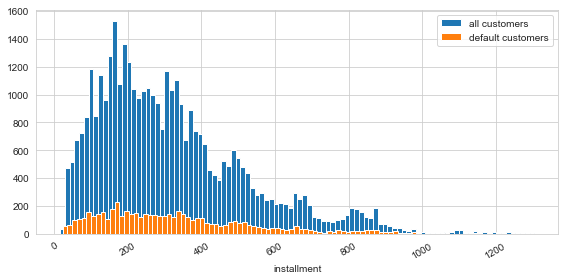

int_rate


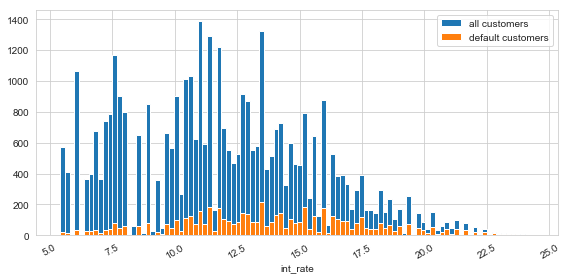

dti


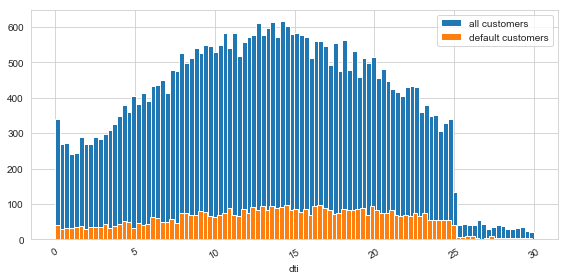

revol_bal


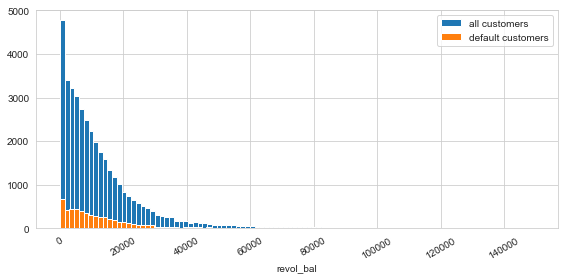

open_acc


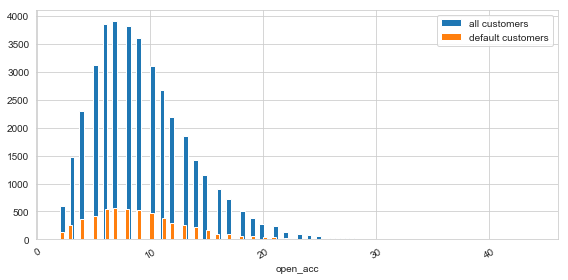

total_acc


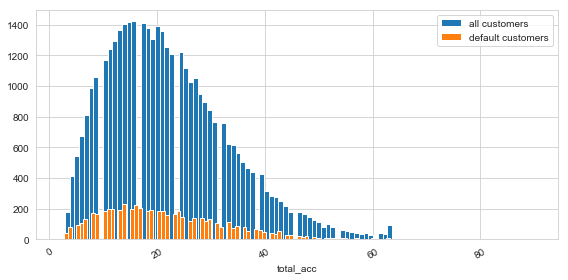

In [185]:
#Plotting histogram for defaulters and all customers to compare trends
loan_col = ['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','installment','int_rate','dti','revol_bal',
           'open_acc','total_acc']
loanData_defaulted = loanData.loc[loanData.loan_status == 1]

for col in list(loan_col):
    print(col)
    plt.figure(figsize=(8, 4))
    x = loanData[col]
    y = loanData_defaulted[col]
    plt.hist(x, 100, label='all customers')
    plt.hist(y, 100, label='default customers')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Derived Matrix - Mithun

In [186]:
#Derive the percentage of loans of each term that default.
loan_term = loanData.groupby(['term','loan_status']).size().to_frame('LoanStatusPercentage')
loan_term.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
term       loan_status                      
 36 months 0                       88.909128
           1                       11.090872
 60 months 0                       74.686215
           1                       25.313785

In [187]:
#Derive the percentage of loans of each grade that default.
loan_grade = loanData.groupby(['grade','loan_status']).size().to_frame('LoanStatusPercentage')
loan_grade.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
grade loan_status                      
A     0                       94.006969
      1                        5.993031
B     0                       87.794433
      1                       12.205567
C     0                       82.805719
      1                       17.194281
D     0                       78.013766
      1                       21.986234
E     0                       73.150582
      1                       26.849418
F     0                       67.315574
      1                       32.684426
G     0                       66.220736
      1                       33.779264

In [188]:
#Derive the percentage of loans of each employee tenure that default.
loan_emp_tenure = loanData.groupby(['emp_length_range','loan_status']).size().to_frame('LoanStatusPercentage')
loan_emp_tenure.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
emp_length_range loan_status                      
0 years          0                       85.825200
                 1                       14.174800
0-10 years       0                       86.031449
                 1                       13.968551
10+ years        0                       84.319039
                 1                       15.680961
n/a              0                       77.928364
                 1                       22.071636

In [189]:
#Derive the percentage of loans of each income verification status that default.
loan_emp_tenure = loanData.groupby(['verification_status','loan_status']).size().to_frame('LoanStatusPercentage')
loan_emp_tenure.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
verification_status loan_status                      
Not Verified        0                       87.169043
                    1                       12.830957
Source Verified     0                       85.181358
                    1                       14.818642
Verified            0                       83.196788
                    1                       16.803212

In [190]:
#Derive the percentage of loans of each purpose that default.
loan_emp_tenure = loanData.groupby(['purpose','loan_status']).size().to_frame('LoanStatusPercentage')
loan_emp_tenure.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
purpose            loan_status                      
car                0                       89.326217
                   1                       10.673783
credit_card        0                       89.218222
                   1                       10.781778
debt_consolidation 0                       84.674605
                   1                       15.325395
educational        0                       82.769231
                   1                       17.230769
home_improvement   0                       87.930435
                   1                       12.069565
house              0                       83.923706
                   1                       16.076294
major_purchase     0                       89.674419
                   1                       10.325581
medical            0                       84.434655
                   1                       15.565345
moving             0                       84.027778
                   1                       15.972222
other              0                       83.622251
                   1                       16.377749
renewable_energy   0                       81.372549
                   1                       18.627451
small_business     0                       72.919042
                   1                       27.080958
vacation           0                       85.866667
                   1                       14.133333
wedding            0                       89.632829
                   1                       10.367171

In [191]:
#Derive the percentage of loans of each type of home ownership that default.
loan_emp_tenure = loanData.groupby(['home_ownership','loan_status']).size().to_frame('LoanStatusPercentage')
loan_emp_tenure.groupby(level=[0]).apply(lambda x: x / x.sum()*100)

LoanStatusPercentage
home_ownership loan_status                      
MORTGAGE       0                       86.328653
               1                       13.671347
NONE           0                      100.000000
OTHER          0                       81.632653
               1                       18.367347
OWN            0                       85.109244
               1                       14.890756
RENT           0                       84.637446
               1                       15.362554

### bala - Feature analysis

In [192]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'pub_rec_bankruptcies', 'emp_length_range'],
      dtype='object')

### Grade Vs Loan status

In [193]:
loan_features = ['loan_status','grade','sub_grade','purpose','addr_state']

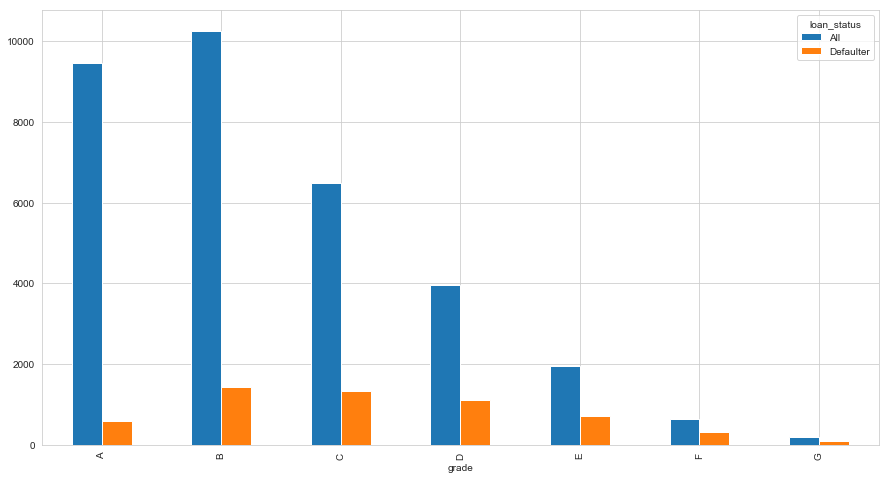

In [194]:

loan_features_df = pd.crosstab(columns=loanData.loan_status,index=loanData.grade)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
loan_features_df

#oan_features_df.columns[0].name="hai
loan_features_df.plot(kind='bar',figsize=(15,8))

### Loan Status Vs Sub_grade

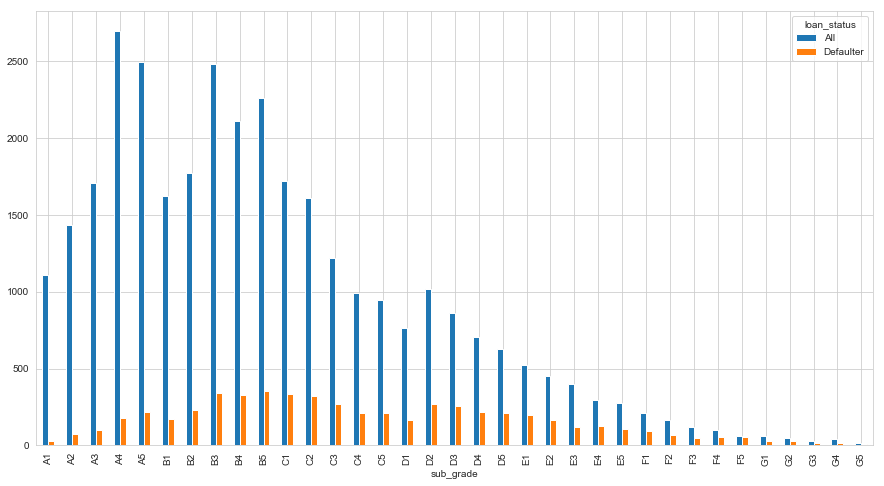

In [195]:

loan_features_df = pd.crosstab(columns=loanData.loan_status,index=loanData.sub_grade)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
loan_features_df

#oan_features_df.columns[0].name="hai
loan_features_df.plot(kind='bar',figsize=(15,8))

### Loan Status Vs Purpose

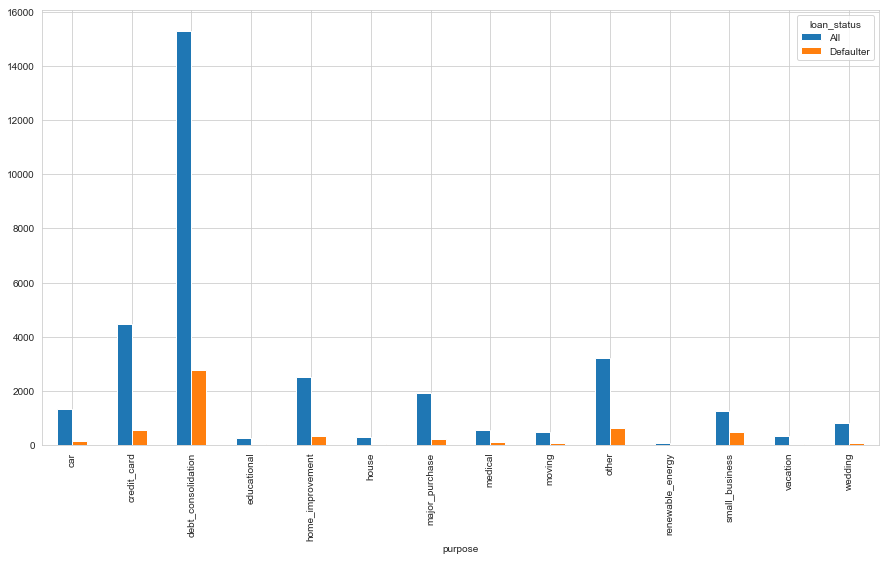

In [196]:

loan_features_df = pd.crosstab(columns=loanData.loan_status,index=loanData.purpose)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
loan_features_df

#oan_features_df.columns[0].name="hai
loan_features_df.plot(kind='bar',figsize=(15,8))

### Loan Status Vs Addr_state

In [211]:

loan_features_df = pd.crosstab(columns=loanData.loan_status,index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
loan_features_df.plot(kind='bar',x='addr_state', y='All',figsize=(15,8))

KeyError: 'addr_state'

### finding the defaluter impact by state and grade 

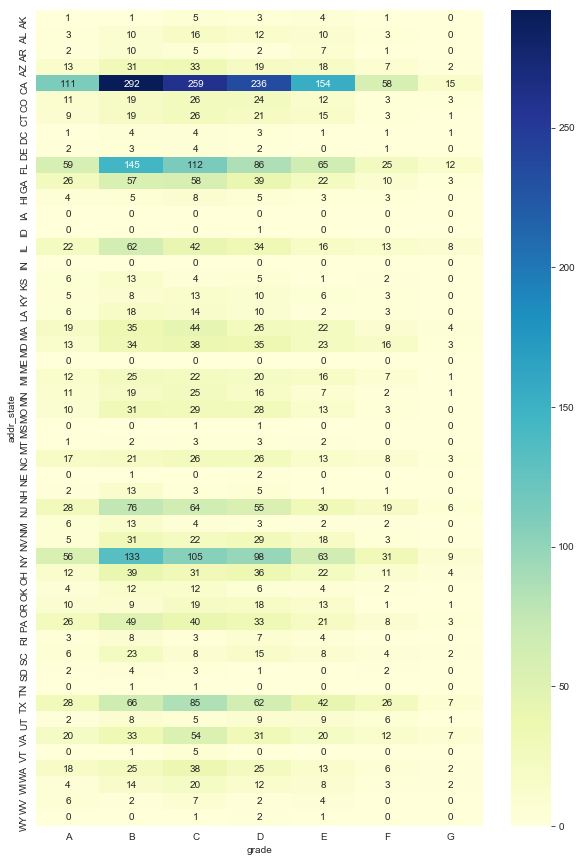

In [198]:

loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.grade],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')


### finding the defaluter impact by state and Purpose

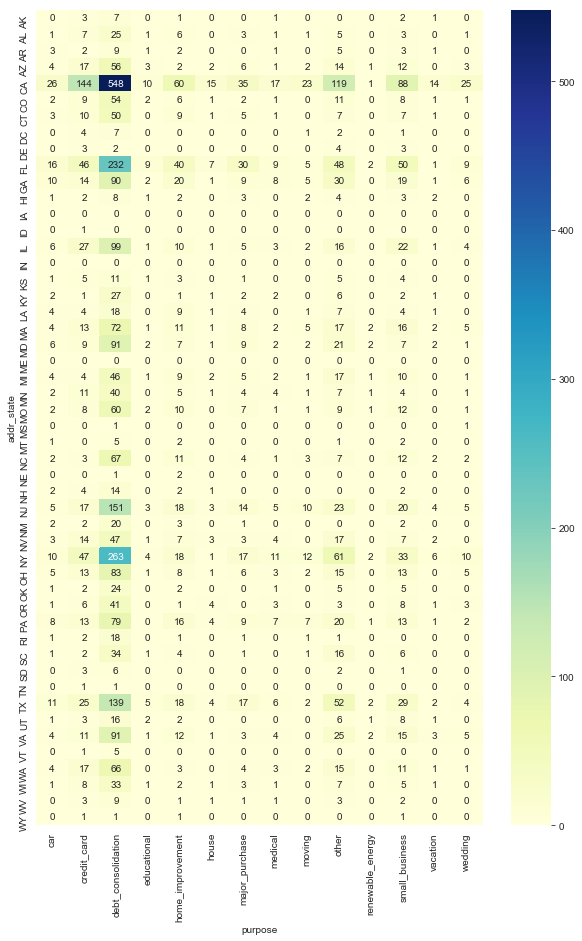

In [199]:
loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.purpose],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')

### Defaulter by emp_lenght and State

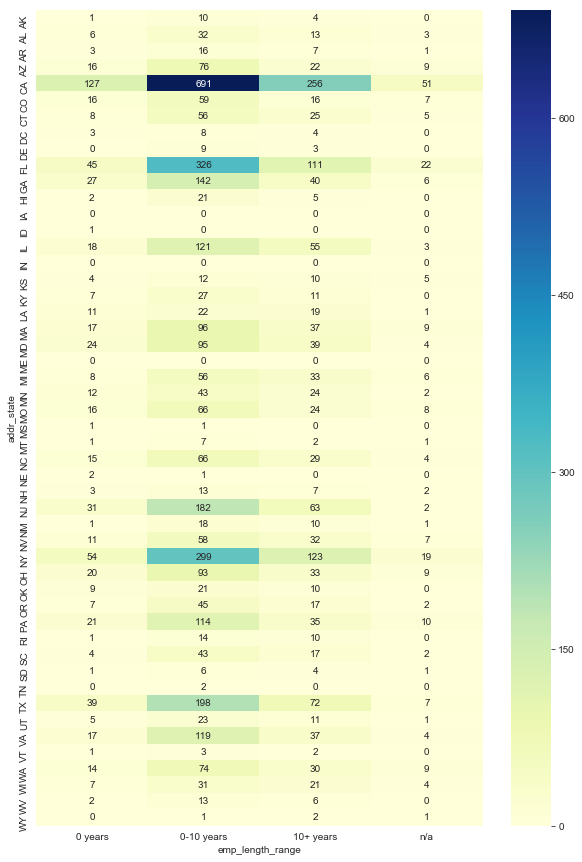

In [200]:
loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.emp_length_range],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')

### Defaulter by home_ownership and State

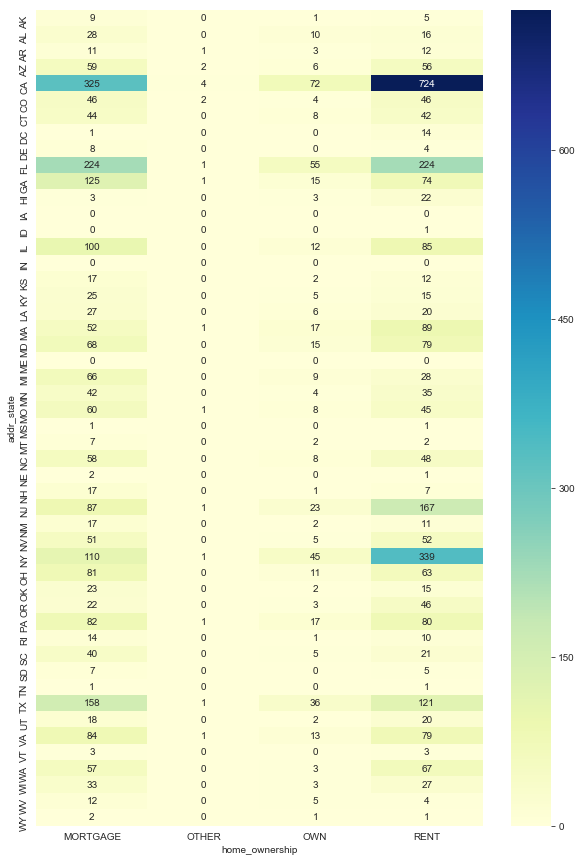

In [201]:
loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.home_ownership],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')

### Defaulter by Public_rec and State

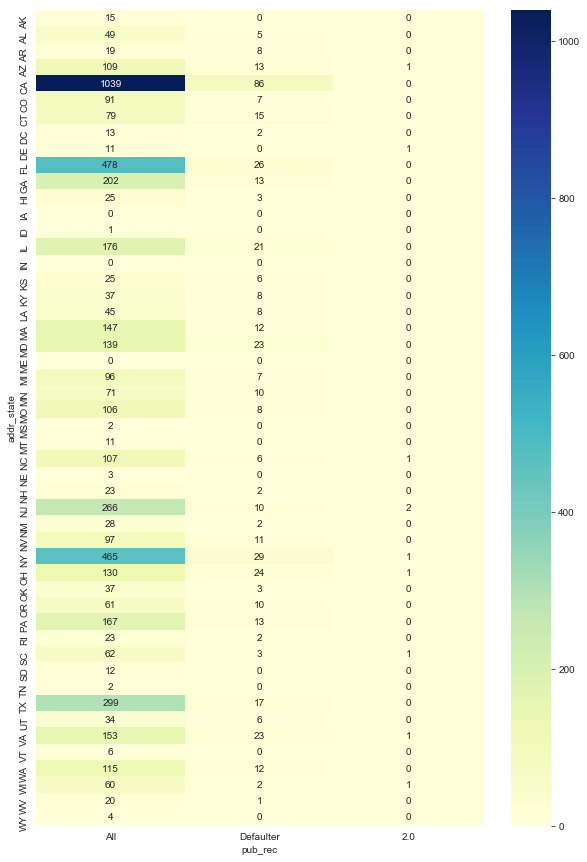

In [202]:
loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.pub_rec],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')

### Defaulter by Public_rec and State

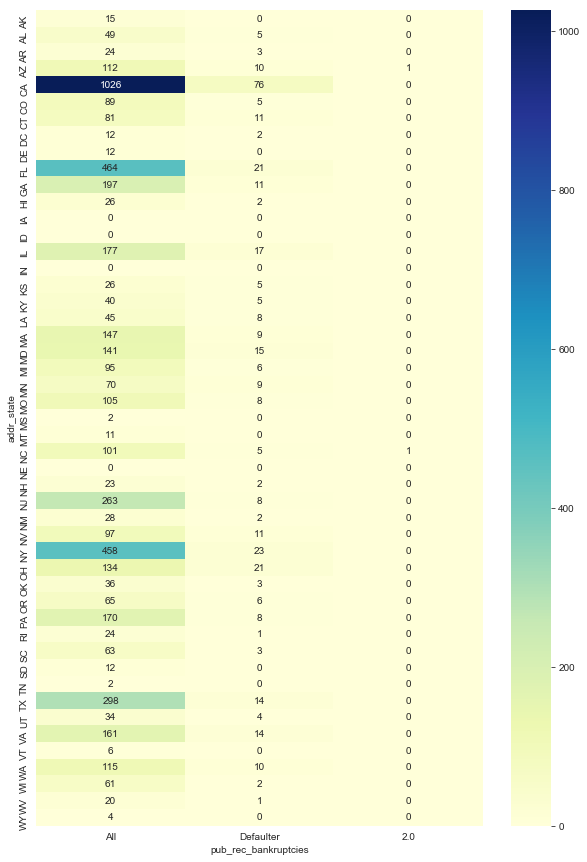

In [203]:
loan_features_df = pd.crosstab(columns=[loanData.loan_status,loanData.pub_rec_bankruptcies],index=loanData.addr_state)
loan_features_df.rename(
  columns={
    0 : 'All',
    1 : 'Defaulter'
  },
  inplace=True
)
plt.figure(figsize=(10,15))
sns.heatmap(data=loan_features_df['Defaulter'],annot=True, cmap="YlGnBu",fmt='g')

In [204]:
defaulters = loanData[loanData.loan_status==1].corr()

In [205]:
#defaulters.drop(columns=['id','member','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment'])

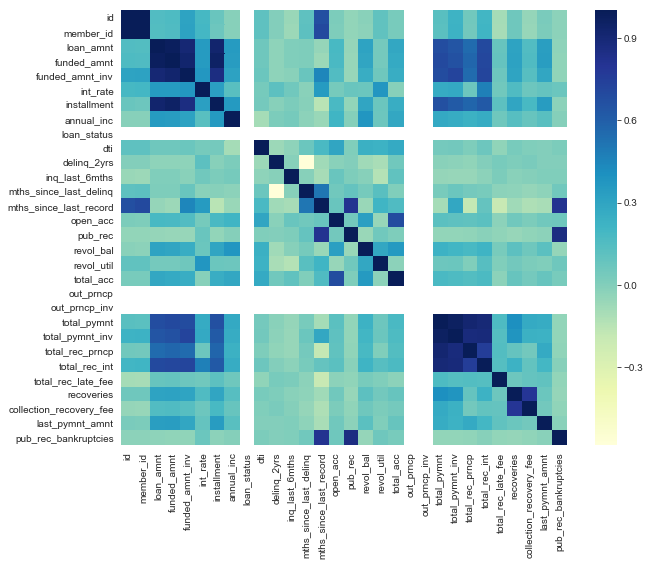

In [206]:
plt.figure(figsize=(10,8))
sns.heatmap(defaulters,cmap="YlGnBu")

In [207]:
defaulters['funded_amnt'].corr(defaulters['total_pymnt'])

0.8853981702462763